In [1]:
# In this project, I'll creating a model that can predict the price of apartments
# in the city of Buenos Aires — with a focus on apartments that cost less than $400,000 USD.


import warnings

import matplotlib.pyplot as plt
import pandas as pd
# import wqet_grader
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)
# wqet_grader.init("Project 2 Assessment")

In [49]:
# creating a function to process files in a file path and return a dataframe
# subset the data frame to focus on apartments that cost less than $400,000 located in "Capital Federal"

def wrangle(filepath):
#     read csv into dataframe
    df = pd.read_csv(filepath, encoding='latin-1')
    
#     subset to properties in capital federal
    place_df = df['place_with_parent_names'].str.contains('Capital Federal')
#     df = df[place_df]
    
#     subset to property type that is "apartments"
    property_type_df = df['property_type'] == 'apartment'
    
#     subset to prices les that $400000
    price_df = df['price_aprox_usd'] <400000
    
    df = df[place_df & property_type_df & price_df]
    
#     subset rempve outliers by surface area covered
    low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
    area_df = df['surface_covered_in_m2'].between(low,high)
    df = df[area_df]
    
    
    return df
    

In [50]:
df = wrangle("data/buenos-aires-real-estate-1.csv")
print("dataframe shape", df.shape)
df.head()

dataframe shape (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [24]:
price_df = df['price_aprox_usd'] <400000
price_df

0        True
4        True
9        True
11       True
18      False
        ...  
8589     True
8590     True
8593     True
8601     True
8604     True
Name: price_aprox_usd, Length: 2068, dtype: bool

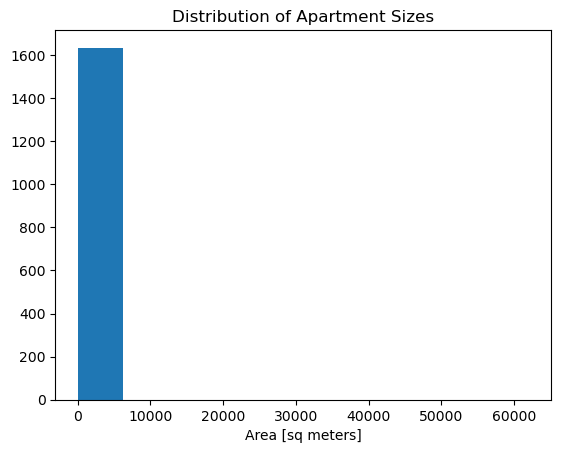

In [34]:
# EDA using a histogam to understand the frequency distibution and find outliers if any
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Apartment Sizes');

In [37]:
df.describe()['surface_covered_in_m2']

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

In [ ]:
# this shows that the data is skewed


In [51]:
low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
area_df = df['surface_covered_in_m2'].between(low,high)
area_df

4       True
9       True
29      True
40      True
41      True
        ... 
8589    True
8590    True
8593    True
8601    True
8604    True
Name: surface_covered_in_m2, Length: 1343, dtype: bool

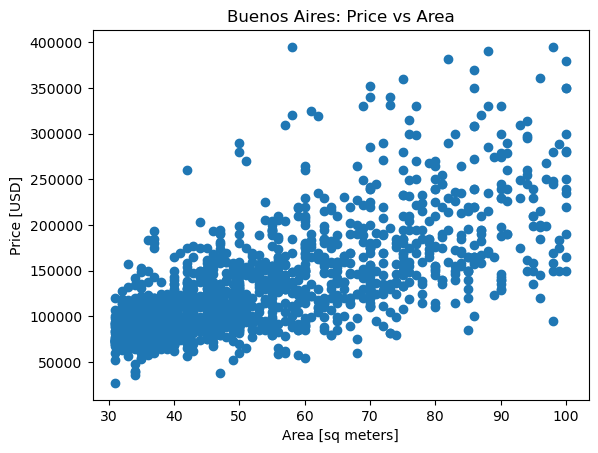

In [53]:
# using a scatter plot to understand the correlation of price and surface area
plt.scatter(x= df['surface_covered_in_m2'], y=df['price_aprox_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Buenos Aires: Price vs Area');

In [ ]:
# This plot suggests that there is a strong correlation between apartment price and surface area

In [56]:
features = ['surface_covered_in_m2']
X_train = df[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [58]:
target = 'price_aprox_usd'
y_train = df[target]
y_train.shape

(1343,)